### **Import relevant libraries**

In [ ]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
main_path ='/content/gdrive/MyDrive/MDS FYP P2 Datasets/'
%cd '/content/gdrive/MyDrive/MDS FYP P2 Datasets/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/MDS FYP P2 Datasets


## **1. Import Dataset**


In [ ]:
# sharelink = "https://drive.google.com/file/d/1jhLD5xc-UIXarEr2e5wqeyk7XIGwR2Zr/view?usp=share_link"

# URL = 'https://drive.google.com/uc?export=download&id='+ sharelink.split('/')[-2]

def dataset_import(sharelink):
  URL = 'https://drive.google.com/uc?export=download&id='+ sharelink.split('/')[-2]
  return URL

df_MenCNT_Sales_2022 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1jhLD5xc-UIXarEr2e5wqeyk7XIGwR2Zr/view?usp=share_link"),index_col=0)
df_MenCNT_Sales_2021 = pd.read_csv(dataset_import("https://drive.google.com/file/d/11CFwxIuY6Iej4o6Nla4qBD8BX0CmaDkp/view?usp=share_link"),index_col=0)

df_MenCNT_Traffic_2022 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1Kk2Gl1RrzUuPpeexZCj03oKWtgwYnOa5/view?usp=share_link"),index_col=0)
df_MenCNT_Traffic_2021 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1Gdy02tlAwjO_BudEsn8IpeT2hVwMNozm/view?usp=share_link"),index_col=0)

df_FB_OxwhiteMY_2022 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1M6gtiVP7cBbfVwJOv_ACjhPCLxrNh1i7/view?usp=share_link"),index_col=0)
df_FB_OxwhiteMY_2021 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1jqDHHdPc82-P7oJZAR78h1UZ6pGokaG7/view?usp=share_link"),index_col=0)

df_MenCNT_AOV_2021_2022 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1aQDAODz2ogYlPEymlovL-fBkpkpqi8jS/view?usp=share_link"),index_col=0)
df_MenCNT_CR_BR_2021_2022 = pd.read_csv(dataset_import("https://drive.google.com/file/d/1Do-bLtzoi1q7aLSCyky3P8QRxMLD7KEk/view?usp=share_link"),index_col=0)


In [ ]:
df_MenCNT_AOV_2021_2022 = df_MenCNT_AOV_2021_2022.reset_index()

df_MenCNT_AOV_2021_2022 = df_MenCNT_AOV_2021_2022[['day','average_order_value']]
df_MenCNT_AOV_2021_2022 = df_MenCNT_AOV_2021_2022.groupby(['day']).agg({'average_order_value':'mean'}).reset_index()

df_MenCNT_AOV_2021_2022 = df_MenCNT_AOV_2021_2022.rename(columns={'day': 'Date'})
df_MenCNT_AOV_2021_2022['Date'] = pd.to_datetime(df_MenCNT_AOV_2021_2022['Date'])
df_MenCNT_AOV_2021_2022 = df_MenCNT_AOV_2021_2022[['Date','average_order_value']]


In [ ]:
df_MenCNT_CR_BR_2021_2022 = df_MenCNT_CR_BR_2021_2022.reset_index()

df_MenCNT_CR_BR_2021_2022 = df_MenCNT_CR_BR_2021_2022[['day','total_conversion','total_bounce_rate']]
df_MenCNT_CR_BR_2021_2022 = df_MenCNT_CR_BR_2021_2022.groupby(['day']).agg({'total_conversion':'mean','total_bounce_rate':'mean'}).reset_index()

df_MenCNT_CR_BR_2021_2022 = df_MenCNT_CR_BR_2021_2022.rename(columns={'day': 'Date','total_conversion':'Website_CR','total_bounce_rate':'Website_BR'})
df_MenCNT_CR_BR_2021_2022['Date'] = pd.to_datetime(df_MenCNT_CR_BR_2021_2022['Date'])
df_MenCNT_CR_BR_2021_2022 = df_MenCNT_CR_BR_2021_2022[['Date','Website_CR','Website_BR']]


In [ ]:
df_MenCNT_AOV_2021_2022.tail(5)

,Date,average_order_value
725,2022-12-27,44.1765
726,2022-12-28,45.8910
727,2022-12-29,61.1400
728,2022-12-30,55.4315
729,2022-12-31,42.8465


In [ ]:
df_MenCNT_CR_BR_2021_2022.tail(5)

,Date,Website_CR,Website_BR
725,2022-12-27,0.060200,0.571755
726,2022-12-28,0.034325,0.587640
727,2022-12-29,0.023490,0.644650
728,2022-12-30,0.033870,0.691430
729,2022-12-31,0.026390,0.671760


In [ ]:
df_MenCNT_Sales_2021_2022 = pd.concat([df_MenCNT_Sales_2021, df_MenCNT_Sales_2022])
df_MenCNT_Sales_2021_2022 = df_MenCNT_Sales_2021_2022.reset_index()
df_MenCNT_Sales_2021_2022['hour'] = pd.to_datetime(df_MenCNT_Sales_2021_2022['hour'])
df_MenCNT_Sales_2021_2022 = df_MenCNT_Sales_2021_2022[['product_title','hour','discounts','total_sales']]
df_MenCNT_Sales_2021_2022.tail(5)

,product_title,hour,discounts,total_sales
13209,Men Premium Weight Cotton Crew Neck Tee (Essen...,2022-12-31 21:00:00,-31.2,124.8
13210,Men Premium Weight Cotton Crew Neck Tee (Seaso...,2022-12-31 22:00:00,-62.4,366.6
13211,Men Premium Weight Cotton Crew Neck Tee (Essen...,2022-12-31 22:00:00,-10.0,29.0
13212,Men Premium Weight Cotton Crew Neck Tee (Essen...,2022-12-31 23:00:00,-15.6,62.4
13213,Men Premium Weight Cotton Crew Neck Tee (Seaso...,2022-12-31 23:00:00,-93.6,374.4


In [ ]:
df_MenCNT_Traffic_2021_2022 = pd.concat([df_MenCNT_Traffic_2021,df_MenCNT_Traffic_2022])
df_MenCNT_Traffic_2021_2022 = df_MenCNT_Traffic_2021_2022.reset_index()
df_MenCNT_Traffic_2021_2022['hour'] = pd.to_datetime(df_MenCNT_Traffic_2021_2022['hour'])
df_MenCNT_Traffic_2021_2022 = df_MenCNT_Traffic_2021_2022[['page_path','hour','total_visitors']]
df_MenCNT_Traffic_2021_2022.tail(5)

,page_path,hour,total_visitors
60402,/products/men-premium-weight-cotton-crew-neck-...,2022-12-31 23:00:00,1
60403,/products/men-premium-weight-cotton-crew-neck-...,2022-12-31 23:00:00,2
60404,/products/men-premium-weight-cotton-crew-neck-...,2022-12-31 23:00:00,4
60405,/products/men-premium-weight-cotton-crew-neck-...,2022-12-31 23:00:00,3
60406,/products/men-premium-weight-cotton-crew-neck-...,2022-12-31 23:00:00,4


In [ ]:
df_FB_OxwhiteMY_2021_2022 = pd.concat([df_FB_OxwhiteMY_2021,df_FB_OxwhiteMY_2022])
df_FB_OxwhiteMY_2021_2022 = df_FB_OxwhiteMY_2021_2022.reset_index()
df_FB_OxwhiteMY_2021_2022.columns = df_FB_OxwhiteMY_2021_2022.columns.str.replace('\s+', '_')
df_FB_OxwhiteMY_2021_2022['Reporting_starts'] = pd.to_datetime(df_FB_OxwhiteMY_2021_2022['Reporting_starts'])

df_FB_OxwhiteMY_2021_2022['FB_Conversion_Rate'] = df_FB_OxwhiteMY_2021_2022['Results']/df_FB_OxwhiteMY_2021_2022['Outbound_clicks']
df_FB_OxwhiteMY_2021_2022 = df_FB_OxwhiteMY_2021_2022[['Reporting_starts','Campaign_name','FB_Conversion_Rate','Cost_per_results','Website_purchase_ROAS_(return_on_ad_spend)','CTR_(all)']]
df_FB_OxwhiteMY_2021_2022 = df_FB_OxwhiteMY_2021_2022.rename(columns={'Reporting_starts': 'Date', 'FB_Conversion_Rate': 'FB_Conversion_Rate', 'Cost_per_results': 'FB_CPA', 'Website_purchase_ROAS_(return_on_ad_spend)': 'FB_ROAS', 'CTR_(all)': 'FB_CTR'})
df_FB_OxwhiteMY_2021_2022.tail(50)

<ipython-input-11-39bc483134de>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_FB_OxwhiteMY_2021_2022.columns = df_FB_OxwhiteMY_2021_2022.columns.str.replace('\s+', '_')


,Date,Campaign_name,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR
45575,2022-01-01,Z21 STUDIO | 1 | BAU | Women Premium Weight Cr...,NaN,NaN,NaN,0.000000
45576,2022-01-01,Z21 STUDIO | 0 | BAU | (Men) - Men Premium Wei...,NaN,NaN,NaN,0.000000
45577,2022-01-01,Z21 STUDIO | 1 | WC | MY (Unisex) - Test - Kid...,NaN,NaN,NaN,0.000000
45578,2022-01-01,Z21 STUDIO | 0 | WC | (Men) - Crew Neck - B4F1,NaN,NaN,NaN,0.000000
45579,2022-01-01,Z21 STUDIO | 1 | BAU | Women Premium Weight Cr...,NaN,NaN,NaN,0.000000
45580,2022-01-01,Z21 STUDIO | 0 | TP | (Men) - Men Premium Weig...,NaN,NaN,NaN,0.000000
45581,2022-01-01,🧪👗 Z21 STUDIO | 1 | WC | (Women) - Crew Neck (...,NaN,NaN,NaN,0.000000
45582,2022-01-01,Z21 STUDIO | 0 | WC | (Women) - Crew Neck - B4...,NaN,NaN,NaN,0.000000
45583,2022-01-01,Z21 STUDIO | 1 | BAU | (Men) Premium Weight Cr...,NaN,NaN,NaN,0.000000
45584,2022-01-01,Z21 STUDIO | 0 | BAU | (Men) - Men Premium Wei...,NaN,NaN,NaN,0.000000


##**2. Data Preprocessing**

#### **Drop Missing Values and Duplicates**

In [ ]:
df_MenCNT_Sales_2021_2022['product_title'] = df_MenCNT_Sales_2021_2022['product_title'].astype('category')
df_MenCNT_Traffic_2021_2022['page_path'] = df_MenCNT_Traffic_2021_2022['page_path'].astype('category')

price_cols = ['discounts','total_sales']
df_MenCNT_Sales_2021_2022[price_cols] = df_MenCNT_Sales_2021_2022[price_cols].astype('int')

df_MenCNT_Traffic_2021_2022.dtypes

page_path               category
hour              datetime64[ns]
total_visitors             int64
dtype: object

In [ ]:
unique_product_titles = df_MenCNT_Sales_2021_2022['product_title'].unique()
unique_product_path = df_MenCNT_Traffic_2021_2022['page_path'].unique()


In [ ]:
df_MenCNT_Sales_2021_2022 = df_MenCNT_Sales_2021_2022[~df_MenCNT_Sales_2021_2022['product_title'].str.contains('Flash Deals')]
df_MenCNT_Sales_2021_2022 = df_MenCNT_Sales_2021_2022[~df_MenCNT_Sales_2021_2022['product_title'].str.contains('Clearance')]
df_MenCNT_Sales_2021_2022['product_title'] = 'Men Premium Weight Cotton Crew Neck Tee'

df_MenCNT_Traffic_2021_2022 = df_MenCNT_Traffic_2021_2022[~df_MenCNT_Traffic_2021_2022['page_path'].str.contains('clearance')]
df_MenCNT_Traffic_2021_2022['page_path'] = 'Men Premium Weight Cotton Crew Neck Tee'

df_FB_OxwhiteMY_2021_2022 = df_FB_OxwhiteMY_2021_2022[df_FB_OxwhiteMY_2021_2022['Campaign_name'].str.contains('Men')]
df_FB_OxwhiteMY_2021_2022.tail(5)

<ipython-input-14-305a15208542>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MenCNT_Traffic_2021_2022['page_path'] = 'Men Premium Weight Cotton Crew Neck Tee'


,Date,Campaign_name,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR
45617,2022-01-01,Z21 STUDIO | 1 | WC | (Men) - CNY Crew Neck (1...,NaN,NaN,NaN,0.0
45618,2022-01-01,Z21 STUDIO | 1 | COLD | WC | MY (Men) - Test L...,NaN,NaN,NaN,0.0
45621,2022-01-01,☑️ Z21 STUDIO | 0 | WC | (Men) - CNY Crew Neck...,NaN,NaN,NaN,0.0
45622,2022-01-01,Z21 STUDIO | 1 | COLD | WC | MY (Men) - TEST -...,NaN,NaN,NaN,0.0
45624,2022-01-01,Z21 STUDIO | 0 | WC | (Men) - Crew Neck Tee (H...,NaN,NaN,NaN,0.0


In [ ]:
df_MenCNT_Sales_2021_2022 = df_MenCNT_Sales_2021_2022.groupby(['hour','product_title']).agg({'discounts':'sum','total_sales':'sum'}).reset_index()
df_MenCNT_Traffic_2021_2022 = df_MenCNT_Traffic_2021_2022.groupby(['hour','page_path']).agg({'total_visitors':'sum'}).reset_index()
df_FB_OxwhiteMY_2021_2022 = df_FB_OxwhiteMY_2021_2022.groupby(['Date']).agg({'FB_Conversion_Rate':'sum','FB_CPA':'sum','FB_ROAS':'sum', 'FB_CTR':'sum'}).reset_index()
df_FB_OxwhiteMY_2021_2022.tail(5)

,Date,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR
725,2022-12-27,0.238278,77.602500,12.541283,3.258448
726,2022-12-28,0.145484,186.991250,11.717639,3.082170
727,2022-12-29,0.256075,95.583333,9.755470,3.072410
728,2022-12-30,0.088235,46.621667,7.628455,2.925956
729,2022-12-31,0.000000,0.000000,0.000000,0.959561


In [ ]:
df_MenCNT_Traffic_2021_2022.tail(5)

,hour,page_path,total_visitors
16438,2022-12-31 19:00:00,Men Premium Weight Cotton Crew Neck Tee,26
16439,2022-12-31 20:00:00,Men Premium Weight Cotton Crew Neck Tee,24
16440,2022-12-31 21:00:00,Men Premium Weight Cotton Crew Neck Tee,24
16441,2022-12-31 22:00:00,Men Premium Weight Cotton Crew Neck Tee,27
16442,2022-12-31 23:00:00,Men Premium Weight Cotton Crew Neck Tee,14


In [ ]:
#Input missing rows based on the missing values in DateTime column
df_MenCNT_Sales_2021_2022 = df_MenCNT_Sales_2021_2022.set_index('hour').resample('1H').asfreq().reset_index()
df_MenCNT_Sales_2021_2022.tail(5)

,hour,product_title,discounts,total_sales
17515,2022-12-31 19:00:00,NaN,NaN,NaN
17516,2022-12-31 20:00:00,Men Premium Weight Cotton Crew Neck Tee,-46.0,187.0
17517,2022-12-31 21:00:00,Men Premium Weight Cotton Crew Neck Tee,-150.0,628.0
17518,2022-12-31 22:00:00,Men Premium Weight Cotton Crew Neck Tee,-72.0,395.0
17519,2022-12-31 23:00:00,Men Premium Weight Cotton Crew Neck Tee,-108.0,436.0


In [ ]:
#Join the dataframes
result_df = pd.merge(df_MenCNT_Sales_2021_2022, df_MenCNT_Traffic_2021_2022, on='hour', how='left')
result_df.tail(5)

,hour,product_title,discounts,total_sales,page_path,total_visitors
17515,2022-12-31 19:00:00,NaN,NaN,NaN,Men Premium Weight Cotton Crew Neck Tee,26.0
17516,2022-12-31 20:00:00,Men Premium Weight Cotton Crew Neck Tee,-46.0,187.0,Men Premium Weight Cotton Crew Neck Tee,24.0
17517,2022-12-31 21:00:00,Men Premium Weight Cotton Crew Neck Tee,-150.0,628.0,Men Premium Weight Cotton Crew Neck Tee,24.0
17518,2022-12-31 22:00:00,Men Premium Weight Cotton Crew Neck Tee,-72.0,395.0,Men Premium Weight Cotton Crew Neck Tee,27.0
17519,2022-12-31 23:00:00,Men Premium Weight Cotton Crew Neck Tee,-108.0,436.0,Men Premium Weight Cotton Crew Neck Tee,14.0


In [ ]:
result_df['day_of_week'] = result_df['hour'].dt.dayofweek
result_df['hour_of_day'] = result_df['hour'].dt.hour

result_df['Date'] = result_df['hour'].dt.date
result_df['Date'] = pd.to_datetime(result_df['Date'])
result_df = pd.merge(result_df, df_FB_OxwhiteMY_2021_2022, on='Date', how='left')

result_df = pd.merge(result_df, df_MenCNT_AOV_2021_2022, on='Date', how='left')
result_df = pd.merge(result_df, df_MenCNT_CR_BR_2021_2022, on='Date', how='left')

result_df.tail(5)

,hour,product_title,discounts,total_sales,page_path,total_visitors,day_of_week,hour_of_day,Date,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR,average_order_value,Website_CR,Website_BR
17515,2022-12-31 19:00:00,NaN,NaN,NaN,Men Premium Weight Cotton Crew Neck Tee,26.0,5,19,2022-12-31,0.0,0.0,0.0,0.959561,42.8465,0.02639,0.67176
17516,2022-12-31 20:00:00,Men Premium Weight Cotton Crew Neck Tee,-46.0,187.0,Men Premium Weight Cotton Crew Neck Tee,24.0,5,20,2022-12-31,0.0,0.0,0.0,0.959561,42.8465,0.02639,0.67176
17517,2022-12-31 21:00:00,Men Premium Weight Cotton Crew Neck Tee,-150.0,628.0,Men Premium Weight Cotton Crew Neck Tee,24.0,5,21,2022-12-31,0.0,0.0,0.0,0.959561,42.8465,0.02639,0.67176
17518,2022-12-31 22:00:00,Men Premium Weight Cotton Crew Neck Tee,-72.0,395.0,Men Premium Weight Cotton Crew Neck Tee,27.0,5,22,2022-12-31,0.0,0.0,0.0,0.959561,42.8465,0.02639,0.67176
17519,2022-12-31 23:00:00,Men Premium Weight Cotton Crew Neck Tee,-108.0,436.0,Men Premium Weight Cotton Crew Neck Tee,14.0,5,23,2022-12-31,0.0,0.0,0.0,0.959561,42.8465,0.02639,0.67176


In [ ]:
result_df = result_df[['hour','Date','day_of_week','hour_of_day','discounts','total_visitors','average_order_value','Website_BR','Website_CR','FB_Conversion_Rate','FB_CPA','FB_ROAS','FB_CTR','total_sales']]
result_df.tail(5)

,hour,Date,day_of_week,hour_of_day,discounts,total_visitors,average_order_value,Website_BR,Website_CR,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR,total_sales
17515,2022-12-31 19:00:00,2022-12-31,5,19,NaN,26.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,NaN
17516,2022-12-31 20:00:00,2022-12-31,5,20,-46.0,24.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,187.0
17517,2022-12-31 21:00:00,2022-12-31,5,21,-150.0,24.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,628.0
17518,2022-12-31 22:00:00,2022-12-31,5,22,-72.0,27.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,395.0
17519,2022-12-31 23:00:00,2022-12-31,5,23,-108.0,14.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,436.0


In [ ]:
# Feature Engineering on Campaign and Event periods
testing = result_df.copy()
# Define function to check whether date falls within any campaign date range
def is_campaign(date):
    for campaign in campaigns_2021_2022:
        if date in campaign:
            return 1
    return 0

def is_holiday(date):
    for holiday in holidays_2021_2022:
        if date in holiday:
            return 1
    return 0


# Define campaign date ranges
campaigns_2021_2022 = [
    pd.date_range(start='2021-01-19', end='2021-02-08'),
    pd.date_range(start='2021-04-26', end='2021-05-17'),
    pd.date_range(start='2021-06-01', end='2021-07-01'),
    pd.date_range(start='2021-09-01', end='2021-09-15'),
    pd.date_range(start='2021-11-01', end='2021-11-12'),
    pd.date_range(start='2021-12-01', end='2021-12-13'),
    pd.date_range(start='2021-12-13', end='2022-01-02'),
    pd.date_range(start='2022-01-10', end='2022-02-09'),
    pd.date_range(start='2022-03-29', end='2022-04-26'),
    pd.date_range(start='2022-06-01', end='2022-08-01'),
    pd.date_range(start='2022-08-06', end='2022-08-22'),
    pd.date_range(start='2022-08-22', end='2022-10-03'),
    pd.date_range(start='2022-10-03', end='2022-11-01'),
    pd.date_range(start='2022-12-09', end='2023-01-01')
]

# Define holidays date range
holidays_2021_2022 = [
    pd.date_range(start='2021-01-01', end='2021-01-02'),
    pd.date_range(start='2021-01-28', end='2021-01-29'),
    pd.date_range(start='2021-02-01', end='2021-02-02'),
    pd.date_range(start='2021-02-12', end='2021-02-14'),
    pd.date_range(start='2021-04-29', end='2021-05-02'),
    pd.date_range(start='2021-05-09', end='2021-05-10'),
    pd.date_range(start='2021-05-13', end='2021-05-15'),
    pd.date_range(start='2021-05-26', end='2021-05-27'),
    pd.date_range(start='2021-06-07', end='2021-06-08'),
    pd.date_range(start='2021-06-20', end='2021-06-21'),
    pd.date_range(start='2021-07-20', end='2021-07-22'),
    pd.date_range(start='2021-08-10', end='2021-08-11'),
    pd.date_range(start='2021-08-31', end='2021-09-01'),
    pd.date_range(start='2021-09-16', end='2021-09-17'),
    pd.date_range(start='2021-10-19', end='2021-10-20'),
    pd.date_range(start='2021-11-04', end='2021-11-05'),
    pd.date_range(start='2021-11-20', end='2021-11-21'),
    pd.date_range(start='2021-12-03', end='2021-12-04'),
    pd.date_range(start='2021-12-11', end='2021-12-12'),
    pd.date_range(start='2021-12-24', end='2021-12-25'),
    pd.date_range(start='2022-01-01', end='2022-01-02'),
    pd.date_range(start='2022-01-18', end='2022-01-19'),
    pd.date_range(start='2022-02-01', end='2022-02-04'),
    pd.date_range(start='2022-04-19', end='2022-04-20'),
    pd.date_range(start='2022-05-01', end='2022-05-05'),
    pd.date_range(start='2022-05-08', end='2022-05-09'),
    pd.date_range(start='2022-05-15', end='2022-05-17'),
    pd.date_range(start='2022-06-06', end='2022-06-07'),
    pd.date_range(start='2022-06-19', end='2022-06-20'),
    pd.date_range(start='2022-07-10', end='2022-07-12'),
    pd.date_range(start='2022-07-30', end='2022-08-01'),
    pd.date_range(start='2022-08-31', end='2022-09-01'),
    pd.date_range(start='2022-09-16', end='2022-09-17'),
    pd.date_range(start='2022-10-09', end='2022-10-11'),
    pd.date_range(start='2022-10-24', end='2022-10-25'),
    pd.date_range(start='2022-11-18', end='2022-11-21'),
    pd.date_range(start='2022-11-28', end='2022-11-29'),
    pd.date_range(start='2022-12-11', end='2022-12-13'),
    pd.date_range(start='2022-12-25', end='2022-12-27')
]

# Create new feature "Campaign"
testing['Campaign'] = testing['Date'].apply(is_campaign)
# Create new feature "Holidays"
testing['Holidays'] = testing['Date'].apply(is_campaign)

testing = testing[['hour','Date','day_of_week','hour_of_day','Campaign','Holidays','discounts','total_visitors','average_order_value','Website_BR','Website_CR','FB_Conversion_Rate','FB_CPA','FB_ROAS','FB_CTR','total_sales']]
testing.head(50)



#2021
# CNY2021_Camp_dates = pd.date_range(start='2021-01-19', end='2021-02-07')
# Hariraya2021_Camp_dates = pd.date_range(start='2021-04-26', end='2021-05-16')
# Birthday2021_Camp_dates = pd.date_range(start='2021-06-01', end='2021-06-30')
# Shopping_Day_9_9_2021_Camp_dates = pd.date_range(start='2021-09-01', end='2021-09-14')
# Shopping_Day_11_11_2021_Camp_dates = pd.date_range(start='2021-11-01', end='2021-11-11')
# Shopping_Day_12_12_2021_Camp_dates = pd.date_range(start='2021-12-01', end='2021-12-12')
# christmas_2021_Camp_dates = pd.date_range(start='2021-12-13', end='2022-01-01')
# #2022
# CNY2022_Camp_dates = pd.date_range(start='2022-01-10', end='2022-02-08')
# RAYA2022_Camp_dates = pd.date_range(start='2022-03-29', end='2022-04-25')
# Birthday2022_Camp_dates = pd.date_range(start='2022-06-01', end='2022-07-31')
# Voucherhunt_2022_Camp_dates = pd.date_range(start='2022-08-06', end='2022-08-21')
# Shopping_Day_9_9_2022_Camp_dates = pd.date_range(start='2022-08-22', end='2022-10-02')
# Pinktober_2022_Camp_dates = pd.date_range(start='2022-10-03', end='2022-10-31')
# Season_of_gifting_2022_Camp_dates = pd.date_range(start='2022-12-09', end='2022-12-31')




,hour,Date,day_of_week,hour_of_day,Campaign,Holidays,discounts,total_visitors,average_order_value,Website_BR,Website_CR,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR,total_sales
0,2021-01-01 00:00:00,2021-01-01,4,0,0,0,-11.0,8.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,162.0
1,2021-01-01 01:00:00,2021-01-01,4,1,0,0,NaN,11.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
2,2021-01-01 02:00:00,2021-01-01,4,2,0,0,NaN,5.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
3,2021-01-01 03:00:00,2021-01-01,4,3,0,0,NaN,3.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
4,2021-01-01 04:00:00,2021-01-01,4,4,0,0,NaN,1.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
5,2021-01-01 05:00:00,2021-01-01,4,5,0,0,NaN,2.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
6,2021-01-01 06:00:00,2021-01-01,4,6,0,0,NaN,NaN,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
7,2021-01-01 07:00:00,2021-01-01,4,7,0,0,NaN,3.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
8,2021-01-01 08:00:00,2021-01-01,4,8,0,0,NaN,16.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN
9,2021-01-01 09:00:00,2021-01-01,4,9,0,0,NaN,14.0,45.648,0.68571,0.01785,0.035019,50.788889,2.521549,0.621526,NaN


In [ ]:
# fill NaN values with zero
testing.fillna(0, inplace=True)

In [ ]:
testing.tail(5)

,hour,Date,day_of_week,hour_of_day,Campaign,Holidays,discounts,total_visitors,average_order_value,Website_BR,Website_CR,FB_Conversion_Rate,FB_CPA,FB_ROAS,FB_CTR,total_sales
17515,2022-12-31 19:00:00,2022-12-31,5,19,1,1,0.0,26.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,0.0
17516,2022-12-31 20:00:00,2022-12-31,5,20,1,1,-46.0,24.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,187.0
17517,2022-12-31 21:00:00,2022-12-31,5,21,1,1,-150.0,24.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,628.0
17518,2022-12-31 22:00:00,2022-12-31,5,22,1,1,-72.0,27.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,395.0
17519,2022-12-31 23:00:00,2022-12-31,5,23,1,1,-108.0,14.0,42.8465,0.67176,0.02639,0.0,0.0,0.0,0.959561,436.0


In [ ]:
model_df.dropna(subset=['total_sales'], inplace=True)

NameError: ignored

<ipython-input-24-a57408684103>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = testing.corr()


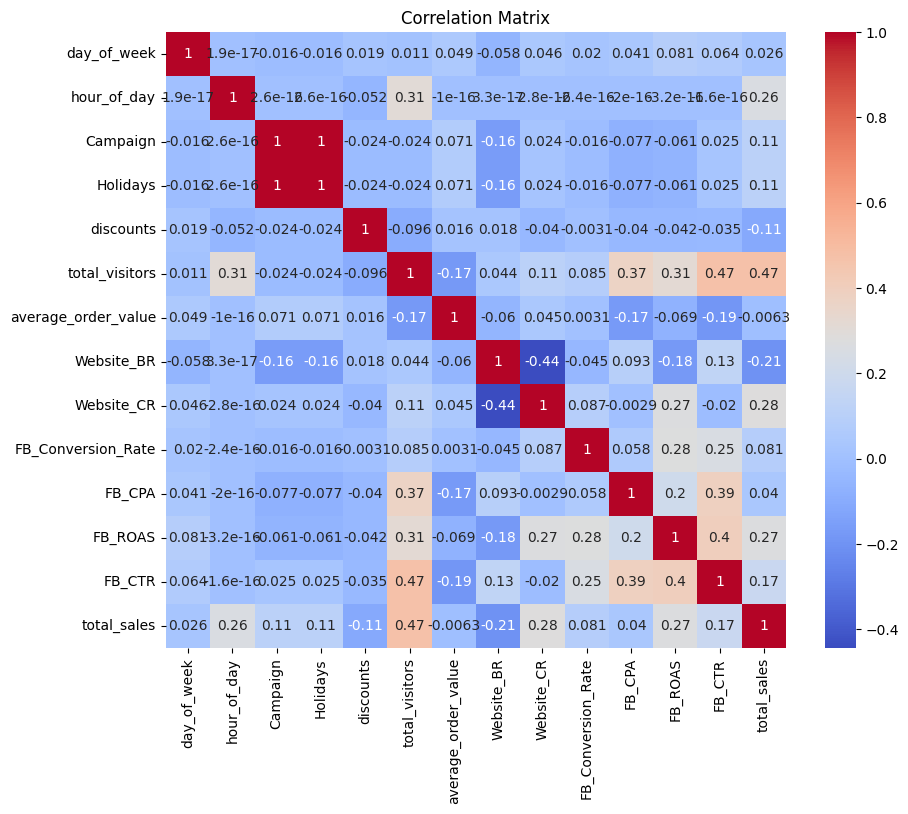

In [ ]:
corr_matrix = testing.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Assuming you want to find the variables with the highest correlation with 'total_sales'
highest_corr_variables = corr_matrix['total_sales'].abs().sort_values(ascending=False)
print(highest_corr_variables)

total_sales            1.000000
total_visitors         0.474615
Website_CR             0.280784
FB_ROAS                0.270566
hour_of_day            0.258292
Website_BR             0.207045
FB_CTR                 0.173119
Campaign               0.112047
Holidays               0.112047
discounts              0.110852
FB_Conversion_Rate     0.081178
FB_CPA                 0.039834
day_of_week            0.025547
average_order_value    0.006325
Name: total_sales, dtype: float64


# **Modelling**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
def mape(actual, predicted):
    """
    Calculates Mean Absolute Percentage Error (MAPE)
    """
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def smape(actual, forecast):
    """
    Compute the Symmetric Mean Absolute Percentage Error between two arrays.
    """
    return np.mean((np.abs(actual - forecast) * 200 / (np.abs(actual) + np.abs(forecast))))

### **LSTM**

In [ ]:
lstm_model_df =testing.copy()

# Extract target variable and features
target_lstm = testing['total_sales']
features_lstm = testing[['day_of_week','hour_of_day','Campaign', 'Holidays','discounts','total_visitors', 'average_order_value','Website_BR','FB_CTR']]

# Split data into training and testing sets
LSTM_train_size = int(0.8 * len(lstm_model_df))
lstm_train_target, lstm_test_target = target_lstm[:LSTM_train_size], target_lstm[LSTM_train_size:]
lstm_train_features, lstm_test_features = features_lstm[:LSTM_train_size], features_lstm[LSTM_train_size:]


In [ ]:
# Step 3: Data preprocessing
# Normalize feature data
scaler = MinMaxScaler()
lstm_train_features = scaler.fit_transform(lstm_train_features)
lstm_test_features = scaler.transform(lstm_test_features)

# Reshape feature data to fit LSTM input shape
lstm_train_features = np.reshape(lstm_train_features, (lstm_train_features.shape[0], lstm_train_features.shape[1], 1))
lstm_test_features = np.reshape(lstm_test_features, (lstm_test_features.shape[0], lstm_test_features.shape[1], 1))

# Step 4: Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(lstm_train_features.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(lstm_train_features, lstm_train_target, epochs=50, batch_size=32)

# Step 5: Make predictions
lstm_predictions = lstm_model.predict(lstm_test_features)


Epoch 1/50
438/438 [==============================] - 7s 8ms/step - loss: 67158.4531
Epoch 2/50
438/438 [==============================] - 3s 7ms/step - loss: 62335.8398
Epoch 3/50
438/438 [==============================] - 3s 7ms/step - loss: 59512.4570
Epoch 4/50
438/438 [==============================] - 5s 11ms/step - loss: 57810.1797
Epoch 5/50
438/438 [==============================] - 4s 8ms/step - loss: 56863.0898
Epoch 6/50
438/438 [==============================] - 3s 7ms/step - loss: 56384.4258
Epoch 7/50
438/438 [==============================] - 3s 7ms/step - loss: 56168.2148
Epoch 8/50
438/438 [==============================] - 3s 7ms/step - loss: 55607.5664
Epoch 9/50
438/438 [==============================] - 4s 9ms/step - loss: 54538.9258
Epoch 10/50
438/438 [==============================] - 3s 8ms/step - loss: 54032.4688
Epoch 11/50
438/438 [==============================] - 3s 7ms/step - loss: 53826.2148
Epoch 12/50
438/438 [==============================] - 3s 7ms/

In [ ]:
lstm_actual_sales = lstm_test_target.values

lstm_rmse = np.sqrt(mean_squared_error(lstm_actual_sales, lstm_predictions))
lstm_mae = mean_absolute_error(lstm_actual_sales, lstm_predictions)

print("RMSE:", lstm_rmse)
print("MAE:", lstm_mae)


RMSE: 169.3479371384017
MAE: 117.42998180623468


### **Exponential Smoothing**

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
es_model_df =testing.copy()

es_cutoff = int(len(es_model_df) * 0.8)
es_train_data = es_model_df[:es_cutoff]
es_test_data = es_model_df[es_cutoff:]

In [ ]:
es_model = ExponentialSmoothing(es_train_data['total_sales'], trend='add', seasonal='add',seasonal_periods=24)
es_model_fit = es_model.fit()


In [ ]:
es_predictions = es_model_fit.forecast(len(es_test_data))


es_rmse = mean_squared_error(es_test_data['total_sales'], es_predictions, squared=False)

es_absolute_error = np.abs(es_test_data['total_sales'] - es_predictions)
es_mape = np.mean(es_absolute_error / es_test_data['total_sales']) * 100
es_smape = np.mean((es_absolute_error * 2) / (es_test_data['total_sales'] + es_predictions)) * 100
es_mae = mean_absolute_error(es_test_data['total_sales'].values,es_predictions)

print("ES RMSE:", es_rmse)
print("ES MAE",es_mae)
# print('ES MAPE:', es_mape)
# print('SMAPE (XGBoost): {:.2f}%'.format(es_smape))

ES RMSE: 816.2006933749157
ES MAE 694.1307423910871


### **XGBoost**

In [ ]:
xgboost_model_df = testing.copy()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true += 0.0001  # add a small value to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [ ]:
# Split the data into training and testing sets
xgboost_x = xgboost_model_df[['hour_of_day','Campaign', 'Holidays','discounts','total_visitors','Website_CR','Website_BR','FB_ROAS','FB_CTR']]
xgboost_y = xgboost_model_df['total_sales']
X_train, X_test, y_train, y_test = train_test_split(xgboost_x, xgboost_y, test_size=0.8, random_state=42)

# Define the XGBoost model
xgboost_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 1000, seed = 42)

# Train the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgboost_model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
xgboost_mse = mean_squared_error(y_test, y_pred)
xgboost_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
smape_xgb = smape(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test,y_pred)

# print("Mean Squared Error:", xgboost_mse)
print("XGBoost RMSE:", xgboost_rmse)
print("XGBoost MAE:",xgb_mae )
# print('XGBoost MAPE:', mean_absolute_percentage_error(y_test,y_pred))
# print('SMAPE (XGBoost): {:.2f}%'.format(smape_xgb))


XGBoost RMSE: 157.56923327271005
XGBoost MAE: 86.57796562556108


### **SARIMAX**

In [ ]:
arimax_model_df = testing.copy()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

arimax_model_df.set_index(['hour'], inplace=True)

# Splitting the data into train and test sets
sarimax_train, sarimax_test = train_test_split(arimax_model_df, test_size=0.2, shuffle=False)

exog_train = sarimax_train[['day_of_week','hour_of_day','Campaign', 'Holidays','discounts','total_visitors', 'average_order_value','Website_BR','FB_CTR']]
exog_test = sarimax_test[['day_of_week','hour_of_day','Campaign', 'Holidays','discounts','total_visitors', 'average_order_value','Website_BR','FB_CTR']]

In [ ]:
sarimax_model = SARIMAX(endog=sarimax_train['total_sales'], exog=exog_train, order=(1,1,1), seasonal_order=(0,1,1,24))
sarimax_results = sarimax_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Make predictions on the test set:
sarimax_predictions = sarimax_results.predict(start=sarimax_test.index[0], end=sarimax_test.index[-1], exog=exog_test)


In [ ]:
#Evaluate the performance of the model using mean squared error:
sarimax_mse = mean_squared_error(sarimax_test['total_sales'], sarimax_predictions)
sarimax_rmse = np.sqrt(sarimax_mse)
smape_sarimax = smape(sarimax_test['total_sales'], sarimax_predictions)
sarimax_mae = mean_absolute_error(sarimax_test['total_sales'],sarimax_predictions)
print('Sarimax RMSE:', sarimax_rmse)
print('Sarimax MAE', sarimax_mae)
# print('Sarimax MAPE:', mean_absolute_percentage_error(sarimax_test['total_sales'],sarimax_predictions))
# print('SMAPE (SARIMAX): {:.2f}%'.format(smape_sarimax))


Sarimax RMSE: 419.4700186604368
Sarimax MAE 343.9333842342056


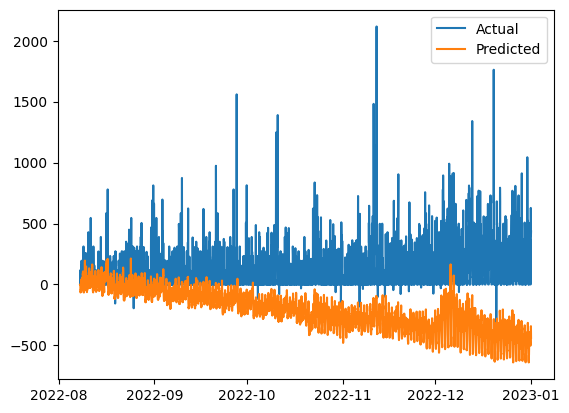

In [ ]:
#Visualize the actual and predicted values using a line plot:
plt.plot(sarimax_test.index, sarimax_test['total_sales'], label='Actual')
plt.plot(sarimax_test.index, sarimax_predictions, label='Predicted')
plt.legend()
plt.show()